# Laboratorio 3
## Pablo Escobar
## Eduardo Ramirez 19946

In [131]:
from pandas import read_csv
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [132]:
# path to the csv file relative to the notebook
file_path = "monthly-sunspots.csv"

# read the data
df = read_csv(file_path)
df.head()


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [133]:
df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


In [134]:
# show missing values
missing_values_count = [col for col in df.columns if df[col].isnull().sum() > 0]
print(missing_values_count)

[]


# FEED FORWARD NN

Epoch 1/50
80/80 [==============================] - 2s 5ms/step - loss: 2860.0393 - val_loss: 1834.4441
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 1804.9579 - val_loss: 1792.9495
Epoch 3/50
80/80 [==============================] - 0s 4ms/step - loss: 1786.1294 - val_loss: 1787.7581
Epoch 4/50
80/80 [==============================] - 0s 4ms/step - loss: 1780.5079 - val_loss: 1788.1064
Epoch 5/50
80/80 [==============================] - 0s 4ms/step - loss: 1776.4740 - val_loss: 1772.3302
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 1778.6477 - val_loss: 1760.0890
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 1761.3032 - val_loss: 1763.9952
Epoch 8/50
80/80 [==============================] - 0s 4ms/step - loss: 1752.9659 - val_loss: 1768.5192
Epoch 9/50
80/80 [==============================] - 0s 4ms/step - loss: 1757.7833 - val_loss: 1764.0710
Epoch 10/50
80/80 [==============================] - 0s 4ms/step

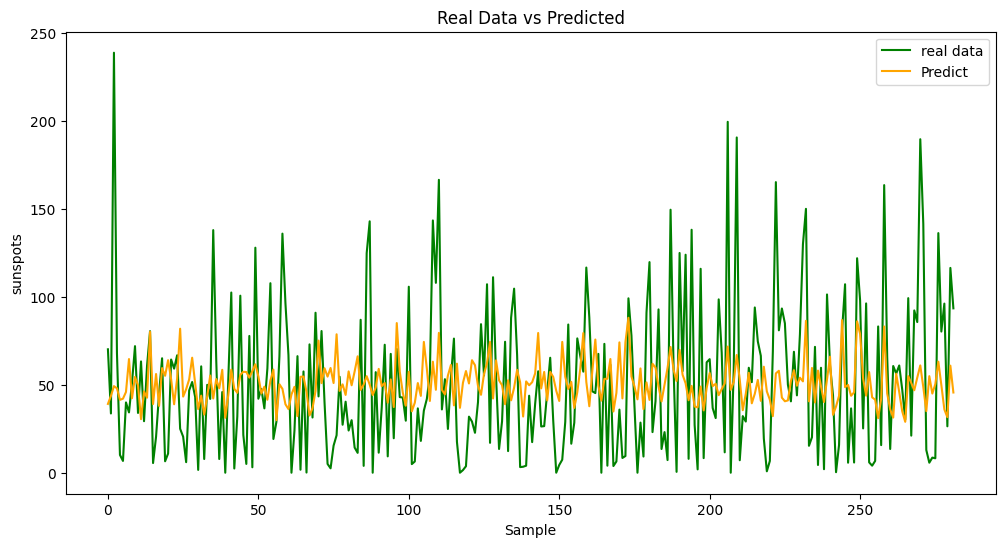

In [135]:


data = pd.read_csv(file_path) 
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]))
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

X = data[['Year', 'Month']]
y = data['Sunspots']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(8, activation='relu'),  
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))
loss = model.evaluate(X_test_scaled, y_test)
print("loss in predict:", loss)
predict = model.predict(X_test_scaled)


plt.figure(figsize=(12, 6))

plt.plot(y_test.reset_index(drop=True), label="real data", color="green")

plt.plot(predict.flatten(), label="Predict", color="orange")

plt.title("Real Data vs Predicted")
plt.xlabel("Sample")
plt.ylabel("sunspots")
plt.legend()
plt.show()

# RNN

In [136]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential([
        SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]),
        Dense(units=dense_units, activation=activation[1])
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [137]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = df.values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data, data

In [138]:
train_data, test_data, data = get_train_test(file_path)

In [139]:
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    X = []
    for i in range(len(Y)):
        start = i*time_steps
        end = start + time_steps
        X.append(dat[start:end])
    X = np.array(X).reshape(len(Y), time_steps, 1)
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [140]:
model = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.2315 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0736 - 331ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0446 - 323ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0291 - 341ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0200 - 353ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0150 - 327ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0120 - 323ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0101 - 341ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0086 - 391ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0079 - 358ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0070 - 326ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0066 - 326ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0061 - 347ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0057 - 402ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0055 - 359ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [141]:
def print_error(trainY, testY, train_predict, test_predict):    
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 3ms/step
Train RMSE: 0.066 RMSE
Test RMSE: 0.104 RMSE


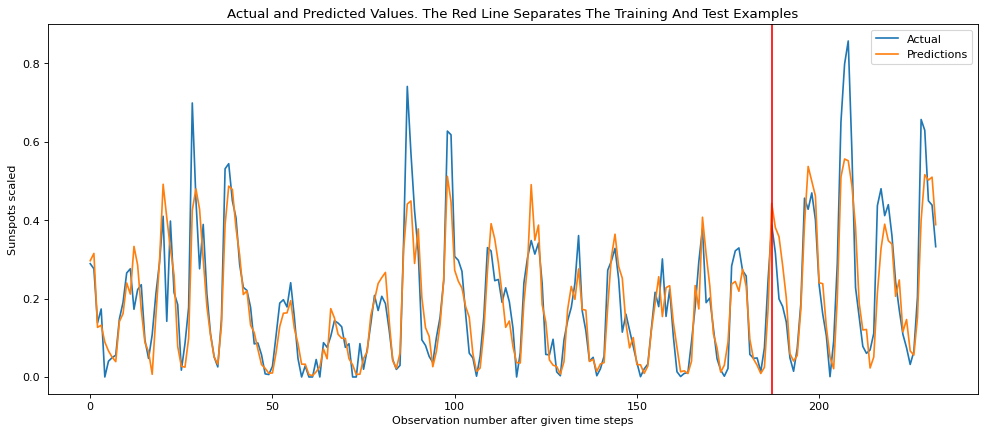

In [142]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

# LSTM

In [143]:
df = read_csv(file_path)
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [144]:
# convert Month date toi datetime
df['Month'] = pd.to_datetime(df['Month'])
# df.set_index('Month', inplace=True)
df.head()


,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


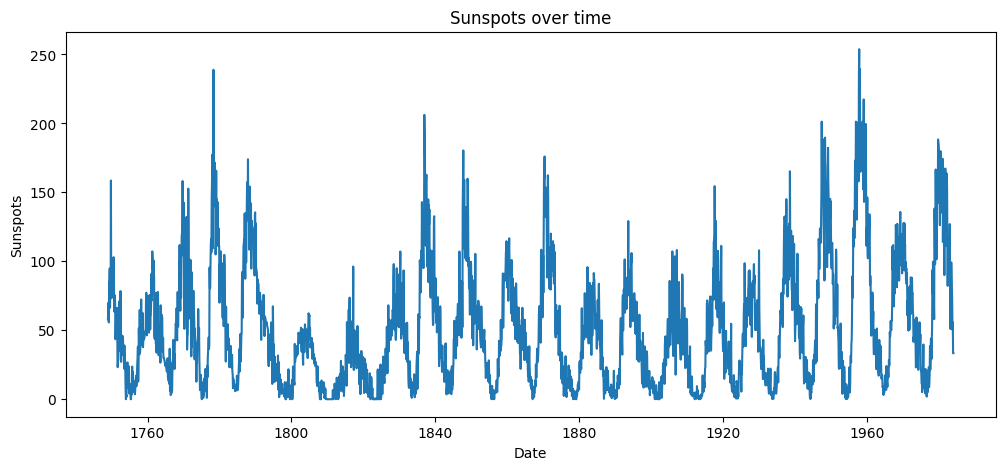

In [145]:
values = df['Sunspots'].values
# graph the values and set the dates as the x axis
plt.figure(figsize=(12, 5))
plt.plot(df['Month'], values)
plt.title('Sunspots over time')
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.show()


In [146]:
train_data, test_data, data = get_train_test(file_path)

In [147]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

Epoch 1/50
3/3 - 3s - loss: 0.1499 - val_loss: 0.2195 - 3s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.1155 - val_loss: 0.1694 - 63ms/epoch - 21ms/step
Epoch 3/50
3/3 - 0s - loss: 0.0904 - val_loss: 0.1273 - 61ms/epoch - 20ms/step
Epoch 4/50
3/3 - 0s - loss: 0.0738 - val_loss: 0.1035 - 65ms/epoch - 22ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0688 - val_loss: 0.0904 - 59ms/epoch - 20ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0684 - val_loss: 0.0869 - 60ms/epoch - 20ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0640 - val_loss: 0.0826 - 58ms/epoch - 19ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0567 - val_loss: 0.0798 - 60ms/epoch - 20ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0537 - val_loss: 0.0785 - 57ms/epoch - 19ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0527 - val_loss: 0.0755 - 59ms/epoch - 20ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0506 - val_loss: 0.0728 - 63ms/epoch - 21ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0474 - val_loss: 0.0733 - 59ms/epoch - 20ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0470 - val_loss: 0.076

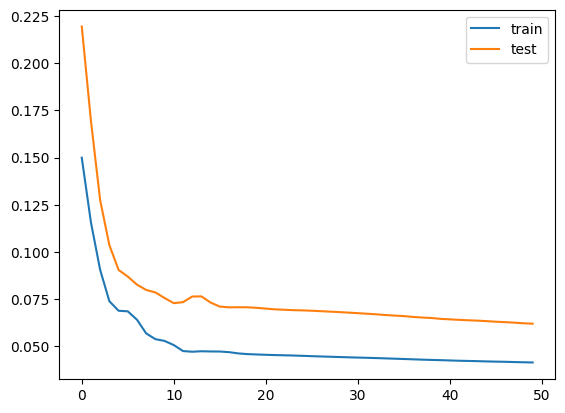

In [148]:
from tensorflow.python.keras.layers.recurrent import LSTM
from matplotlib import pyplot
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainX, trainY, epochs=50, batch_size=72, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

6/6 [==============================] - 0s 4ms/step


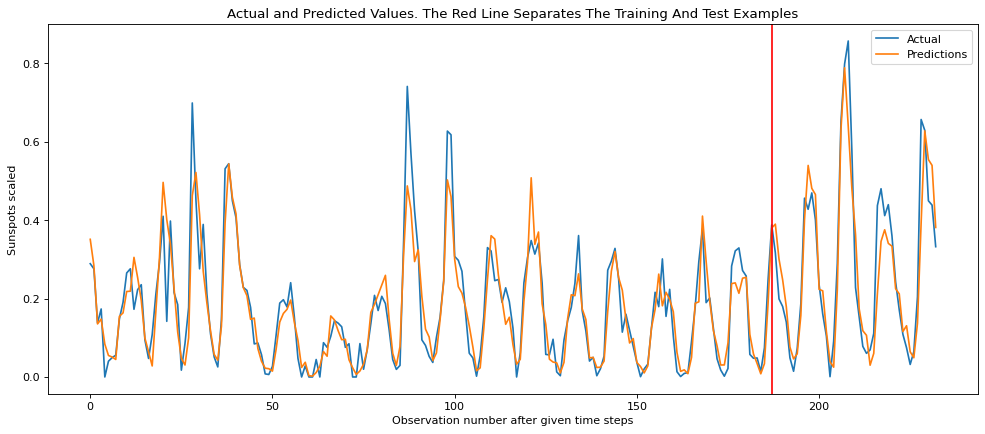

In [149]:
test_predict = model.predict(testX)
train_predict = model.predict(trainX)
real = testY


plot_result(trainY, testY, train_predict, test_predict)
